In [81]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from math import pi
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [82]:
nx = 41
ny = 41

l = 1
h = 1

dx = 1/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [83]:
def L1norm(new, old):
    norm = np.sum(np.abs(new-old))
    return norm

In [84]:
def poissonIG(uh, dx, dy, nx, ny, xmax, xmin, ymax, ymin):
    
    #Mesh
    x = np.linspace(xmin,xmax,nx)
    y = np.linspace(ymin,ymax,ny)
    X,Y = np.meshgrid(x,y)
    
    #Initialize
    psi_i = np.zeros((ny, nx))
    
    w_i = np.zeros((ny, nx))
    
    w_i[-1,:] = -(1/(2*dy**2))*(8*psi_i[-2,:] - psi_i[-3,:])-(3*uh/dy)
    
    #w_i[1:-1,1:-1] = .25 * (psi_i[:-2,1:-1] + psi_i[2:,1:-1] + psi_i[1:-1,:-2] + psi_i[1:-1,2:])
    
    return X, Y, x, y, psi_i, w_i

In [85]:
def stokes_flow(uh, w, p, dx, dy, l1_target):
    
    l1normw = 1
    l1normpsi = 1
    pn = np.empty_like(p)
    wn = np.empty_like(w)
    iterations = 0
    
    while l1normpsi > l1_target and l1normw > l1_target:
        pn = p.copy()
        wn = w.copy()
        
        # BC for w
        wn[-1,:] = -(1/(2*dy**2))*(8*p[-2,:] - pn[-3,:])-(3*uh/dy)
        
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1,:-2] + pn[2:,1:-1] + pn[:-2,1:-1]\
                             + wn[1:-1,1:-1]*dx**2)
        
        """#Dirichlet BC
        p[:,0] = 0
        p[:,-1] = 0
        p[0,:] = 0
        #Neumann BC
        p[:,1] = p[:,0]
        p[:,-2] = p[:,-1]
        p[1,:] = p[0,:]"""
        # BC for w
        wn[-1,:] = -(1/(2*dy**2))*(8*p[-2,:] - pn[-3,:])-(3*uh/dy)
        
        w[1:-1,1:-1] = .25 * (wn[:-2,1:-1] + wn[2:,1:-1] + wn[1:-1,:-2] + wn[1:-1,2:])
        
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1,:-2] + pn[2:,1:-1] + pn[:-2,1:-1]\
                             + wn[1:-1,1:-1]*dx**2)
        
        l1normw = L1norm(w, wn)
        l1normpsi = L1norm(p, pn)
        iterations += 1
    
    print('l1normw =', l1normw, 'l1normpsi =',l1normpsi )
    return p, w, iterations

In [86]:
X, Y, x, y, psi, w = poissonIG(1, dx, dy, nx, ny, 0, l, 0, h)

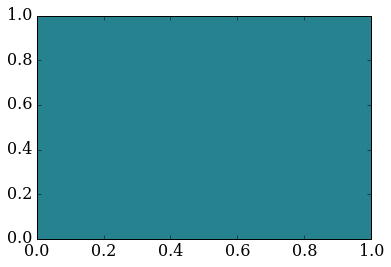

In [87]:
plt.contourf(x, y, psi,cmap=cm.viridis)

In [88]:
p, w, i = stokes_flow(1, w, psi, dx, dy, l1_target)
p = np.flipud(p)

l1normw = 1170.0 l1normpsi = 0.0


In [89]:
psi.shape

(41, 41)

In [90]:
w.shape

(41, 41)

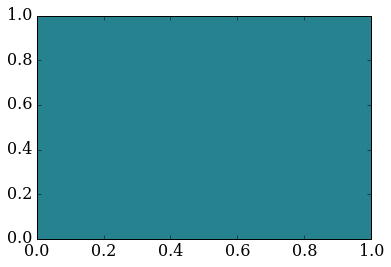

In [91]:
plt.contourf(x, y, p,cmap=cm.viridis)

In [92]:
print(i)

1


In [93]:
#np.set_printoptions(threshold=None)

In [94]:
print(w)

[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.  -30.  -30. ...,  -30.  -30.    0.]
 [-120. -120. -120. ..., -120. -120. -120.]]


In [95]:
np.max(np.abs(p))

0.0

In [96]:
np.round(p[32,::8], 4)

array([ 0.,  0.,  0.,  0.,  0.,  0.])